<a href="https://colab.research.google.com/github/swon95/ML_Body-signal-of-smoking/blob/main/Body_signal_of_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kaggle_data/smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


## 데이터셋 설명
Kaggle Data Set


---

https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

건강 생체 신호 데이터셋을 기반으로, 흡연 여부를 예측하는 모델

- ID : index
- gender (M, F)
- age - 5년 단위
- height(cm) - 키
- weight(kg) - 체중
- waist(cm) - 허리둘레길이
- eyesight(left) - 시력(왼쪽)
- eyesight(right) - 시력(오른쪽)
- hearing(left) - 청력(왼쪽)
- hearing(right) - 청력(오른쪽)
- systolic - 수축계 혈압
- relaxation - 이완계 혈압
- fasting blood sugar - 공복 혈당
- Cholesterol - 총 콜레스테롤수치
- triglyceride - 트리글리세리드, 중성지방
- HDL - 콜레스테롤의 유형
- LDL - 콜레스테롤의 유형
- hemoglobin - 헤모글로빈 수치
- Urine protein - 소변 내 단백질 량
- serum creatinine - 혈청 크레아틴
- AST - 간 건강의 척도
- ALT - 간 건강의 척도
- Gtp - 간 기능 검사
- oral - 구강 건강
- dental caries - 충치의 유무
- tartar - 치석
- smoking - 흡연 유무 (타겟)

# 전처리

## 불필요한 컬럼 제거(id 특성 제거)

In [4]:
# 카디널리티가 샘플 수 만큼 존재했던 id 특성은 제거
# 카디널리티가 높으면(중복도가 적으면) 모델 학습에 편향(과적합)된 학습을 초래하기 때문에
df.drop(labels = 'ID', axis = 1, inplace = True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


d

In [5]:
df.replace({'gender' : {F: 1, M: 0}})

NameError: ignored

상관관계 분석

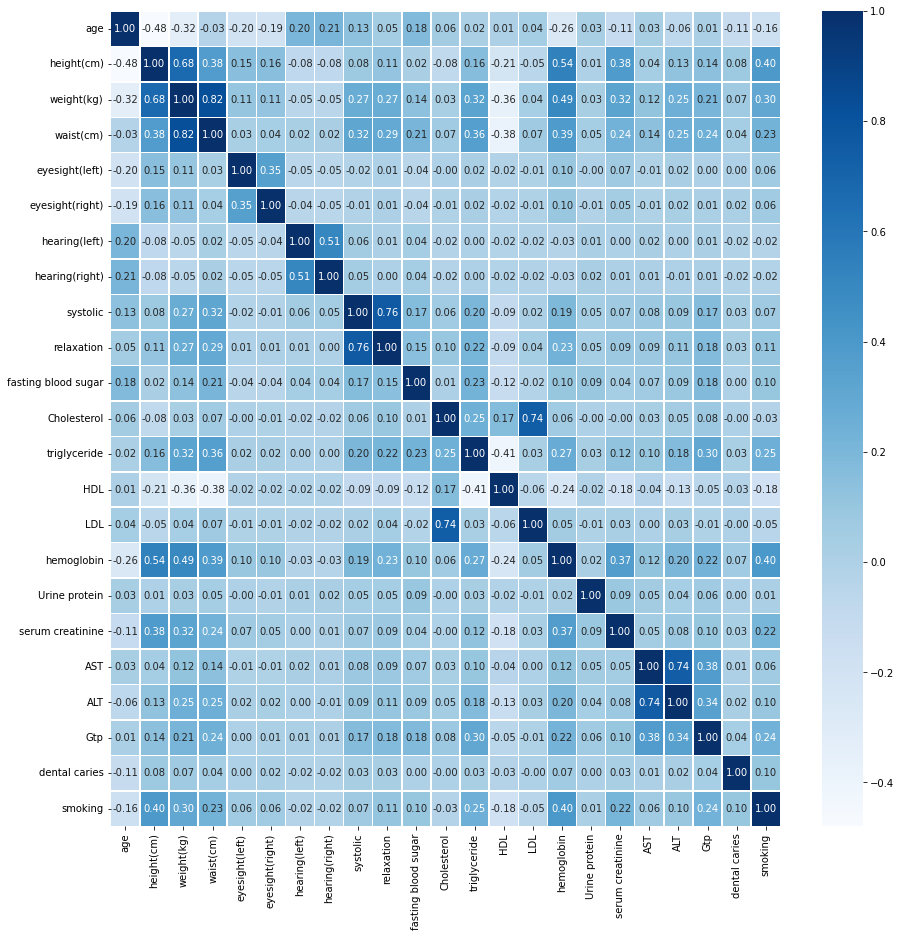

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')